In [24]:
import matplotlib.pyplot as plt
import math
import numpy as np
import matlab.engine

In [25]:
eng = matlab.engine.start_matlab() #Start the matlab engine to be able to use plot1.m


In [26]:
def dict_to_list(dictionary):  #turns a dictonary into lists
    runs = list()
    for key in dictionary:
        params_dic = dictionary[key]
        params_list = list()
        for param in params_dic:
            params_list.append(params_dic[param])
        runs.append(params_list)
    return runs
        

In [27]:
def structure_data(file_name, number_of_parameters):
    f_handler = open(file_name)
    runs = dict() 
    for line in f_handler:
        if (line.find('Run') > -1) or (line.find('Time') > -1): #We want to skip the first two lines
            continue
        line = line.rstrip()         #Get rid off text format junk such as \n
        line = line.split('\t')     #turn them into a list
        num_of_runs = (len(line) + number_of_parameters -1)/number_of_parameters
        index = 0
        for run in range(num_of_runs):
            current_run = runs.get(run, dict())   #for every run, it will get the run list, otherwise, it will create it
            for parameter in range(number_of_parameters): 
                try:
                    value_str = line[index + parameter]
                    value = float(value_str)
                    current_parameter_list = current_run.get(parameter, list())
                    current_parameter_list.append(value)
                    current_run[parameter] = current_parameter_list
                except:
                    continue
            runs[run] = current_run
            index += number_of_parameters
    
    return dict_to_list(runs) #now that all the data is in dictionaries, we turn it into lists
            
        
    
    

In [28]:
adiabatic_air = 'adiabatico-aire.txt'
parameters_adiabatic_air = 4 #Time, Pressure kPa, Voltage (V), Temperature (C)
isothermic_air = 'isotermico-aire.txt'
parameters_isothermic_air = 4 #Time (s)	Barometric Pressure (kPa)	Voltage (V)	Temperature (°C)


adiabatic_helium = 'adiabatico-helio.txt'
parameters_adiabatic_helium = 4 #Time (s)	Barometric Pressure (kPa)	Voltage (V)	Temperature (°C)

isothermic_helium = 'isotermico-helio.txt'
parameters_isothermic_helium = 6 #Time (s)	Voltage (V)	Temperature (°C)	Absolute Pressure (kPa)	h (cm)	T (K)

In [29]:
data_AA = structure_data(adiabatic_air, parameters_adiabatic_air)
data_IA = structure_data(isothermic_air, parameters_isothermic_air)
data_AH = structure_data(adiabatic_helium, parameters_adiabatic_helium)
data_IH = structure_data(isothermic_helium, parameters_isothermic_helium)


In [30]:
for run in data_IH:
    for num in range(len(run[5])):
        run[5][num] = ((run[5][num]-293.15)/40.86) + 293.15 
        


### Change Adiabatic Air C to Kelvin and Voltage to Volume in meters ^ 3



In [31]:
for run in data_AA:  
    for num in range(len(run[3])):
        run[3][num] = (run[3][num]) + 293.15 

for run in data_AA:  
    mini = min(run[2])
    maxi = max(run[2])
    for num in range(len(run[2])): 
        run[2][num] = ((run[2][num]*(15-7)/(maxi-mini))  - (((15-7)*mini)/(maxi-mini)) + 7) 
        
        
for run in data_IA:  
    for num in range(len(run[3])):
        run[3][num] = (run[3][num]) + 293.15 
        
for run in data_IA:  
    for num in range(len(run[2])):
        run[2][num] = 2.18*(run[2][num]) +4.983
        
for run in data_AH:  
    for num in range(len(run[3])):
        run[3][num] = (run[3][num]) + 293.15 

for run in data_AH:  
    for num in range(len(run[2])):
        run[2][num] = 2.18*(run[2][num]) +4.983



# Plots Adiabatic Air


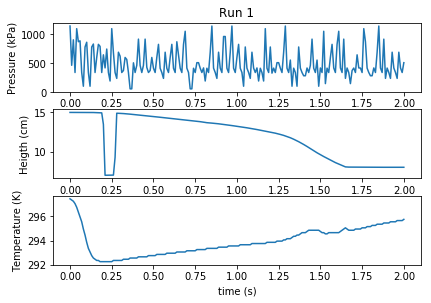

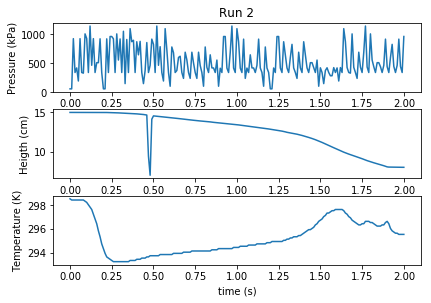

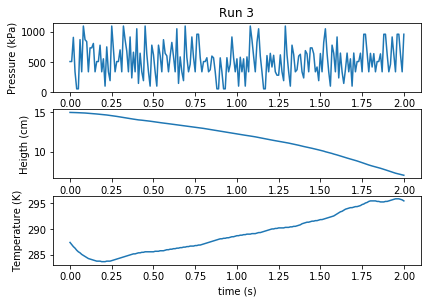

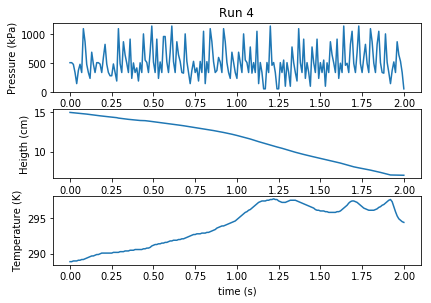

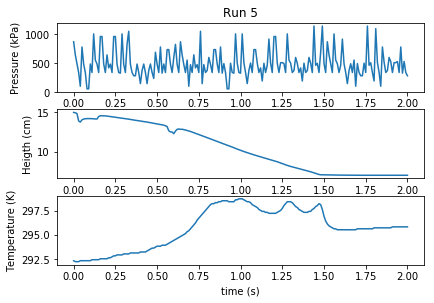

In [32]:
index = 0
for run in data_AA:
    plt.figure(index + 1) 
    plt.subplot(311)
    plt.plot(data_AA[index][0],data_AA[index][1] )
    plt.ylabel('Pressure (kPa)')
    plt.xlabel('time (s)')
    plt.title('Run ' + str(index + 1))


    plt.subplot(312)
    plt.plot(data_AA[index][0],data_AA[index][2] )
    plt.xlabel('time (s)')
    plt.ylabel('Heigth (cm)')



    plt.subplot(313)
    plt.plot(data_AA[index][0],data_AA[index][3] )
    plt.xlabel('time (s)')
    plt.ylabel('Temperature (K)')

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()
    index +=1


In [54]:
for run in data_AA:
    f = open('dummi.txt', 'w+')
    for num in range(len(run[2])):
        f.write(str(run[2][num] ) + ' ' + str(run[3][num]) + ' ' + '0.0001\n')
    f.close()
    z = eng.plot1('dummi.txt' )

# Plots Isothermic Air

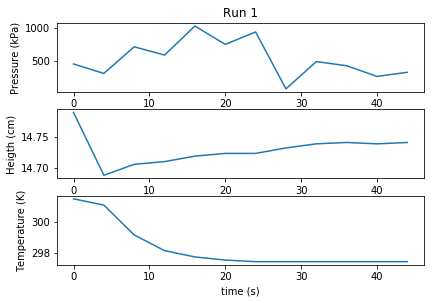

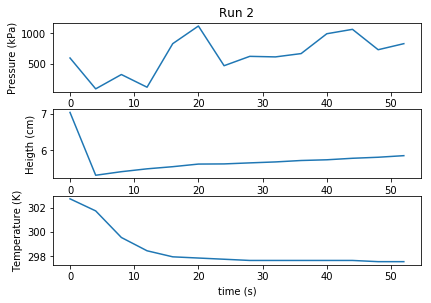

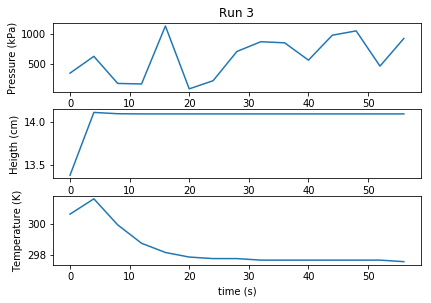

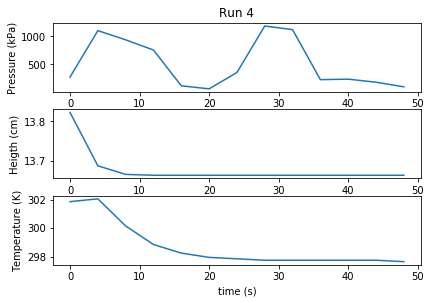

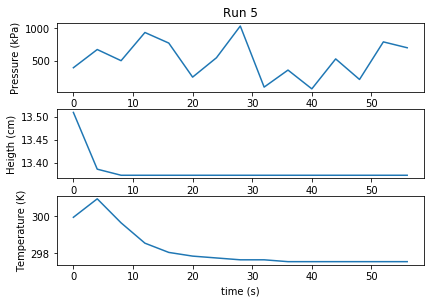

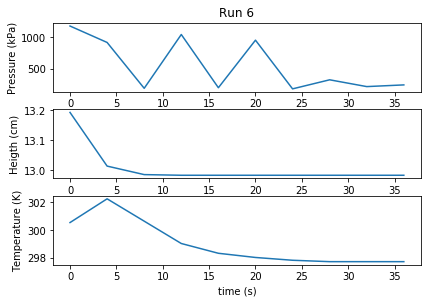

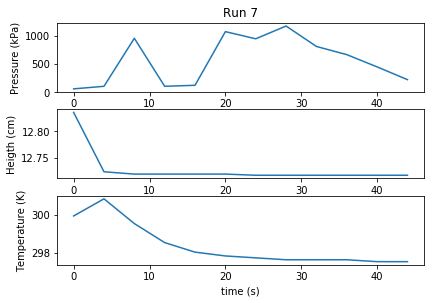

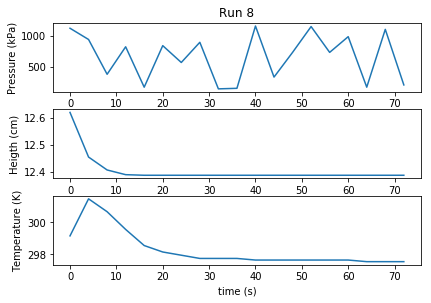

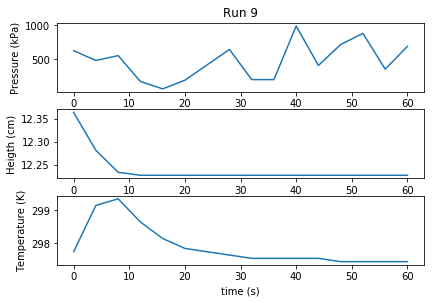

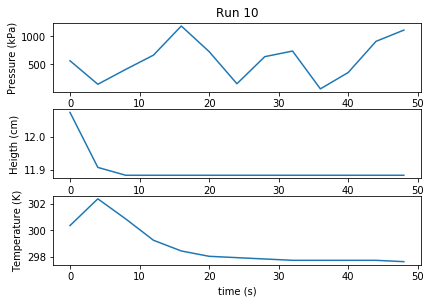

In [33]:
index = 0
for run in data_IA:
    plt.figure(index + 1) 
    plt.subplot(311)
    plt.plot(data_IA[index][0][0::4],data_IA[index][1][0::4] )
    plt.ylabel('Pressure (kPa)')
    plt.xlabel('time (s)')
    plt.title('Run ' + str(index + 1))


    plt.subplot(312)
    plt.plot(data_IA[index][0][0::4],data_IA[index][2] )
    plt.xlabel('time (s)')
    plt.ylabel('Heigth (cm)')



    plt.subplot(313)
    plt.plot(data_IA[index][0][0::4],data_IA[index][3] )
    plt.xlabel('time (s)')
    plt.ylabel('Temperature (K)')

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()
    index +=1



In [61]:
for run in data_IA:
    f = open('dummi.txt', 'w+')
    press = run[1][0::4]
    for num in range(len(run[2])):
        f.write(str(run[2][num] ) + ' ' + str(press[num]) + ' ' + '0.0001\n')
    f.close()
    z = eng.plot1('dummi.txt' ) 

# Plots Adiabatic Helium

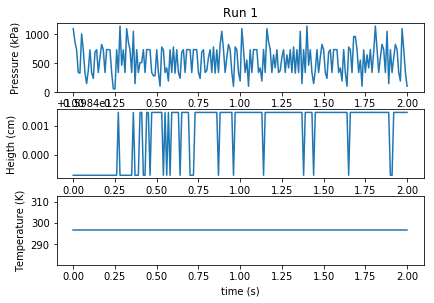

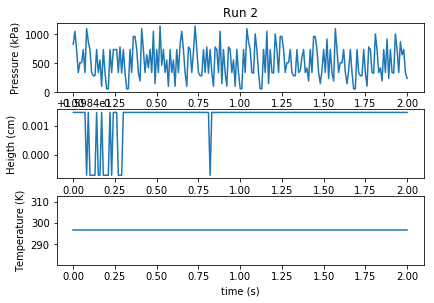

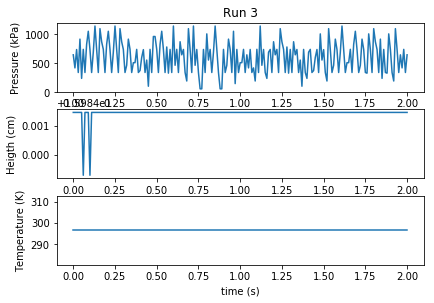

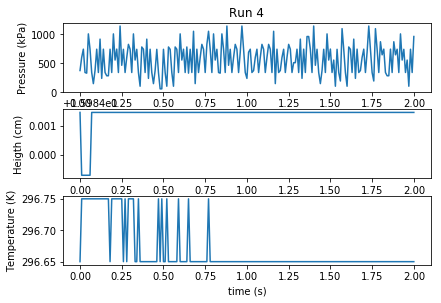

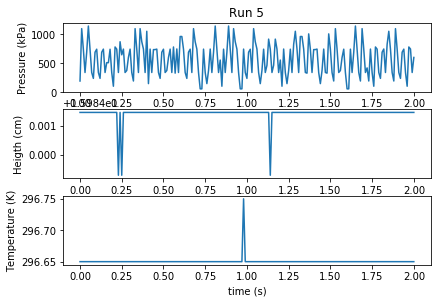

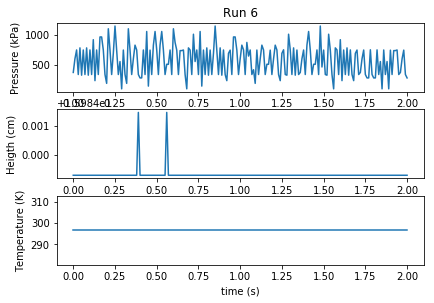

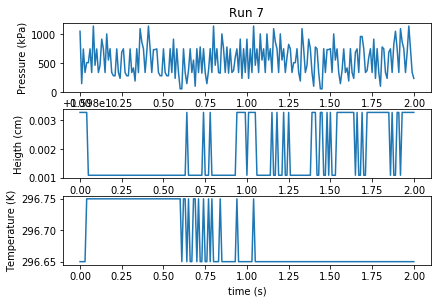

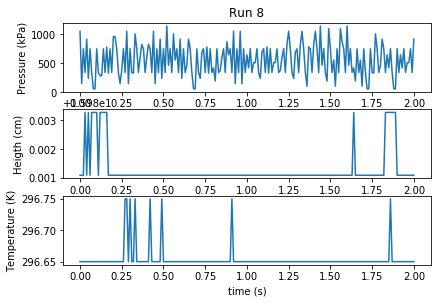

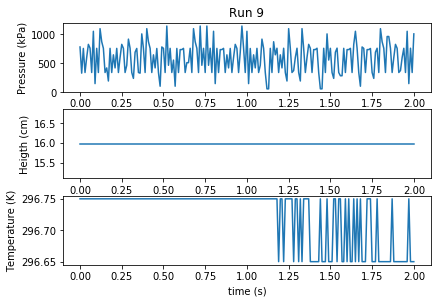

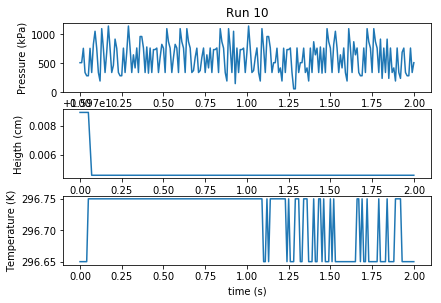

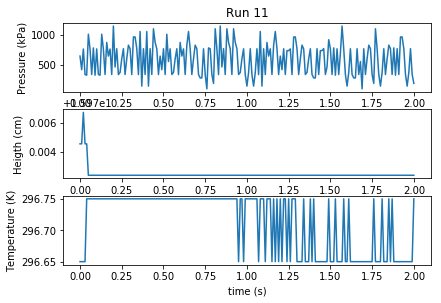

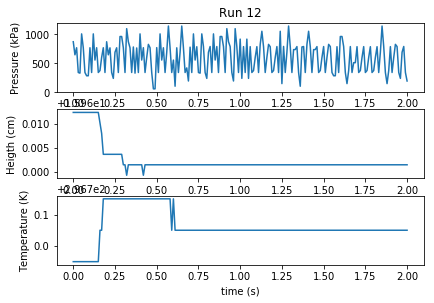

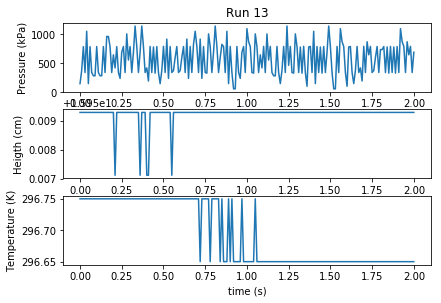

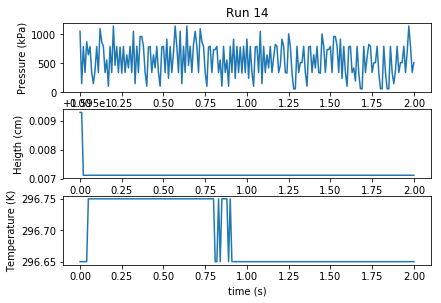

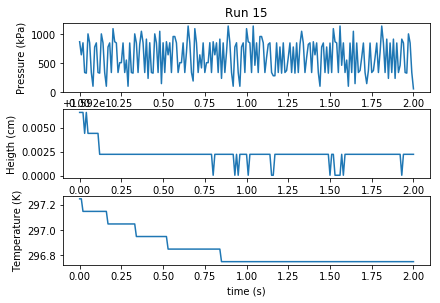

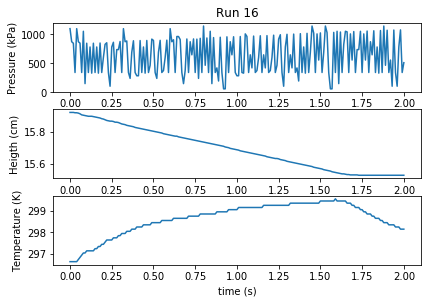

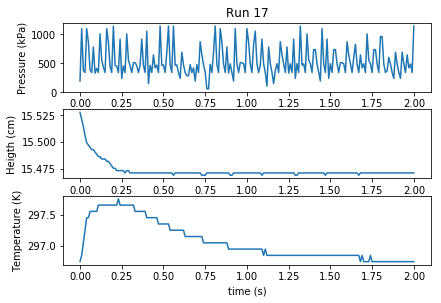

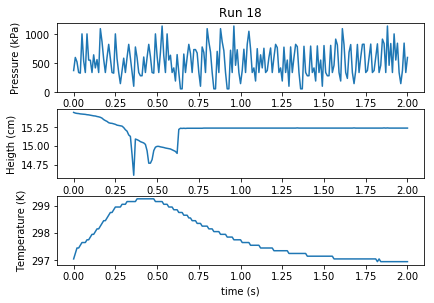

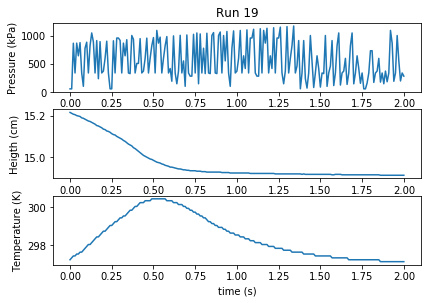

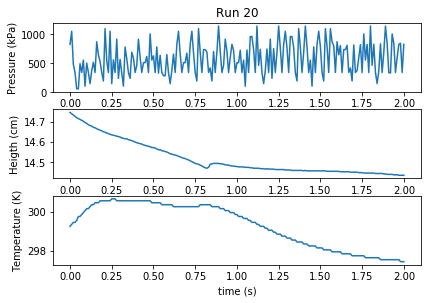

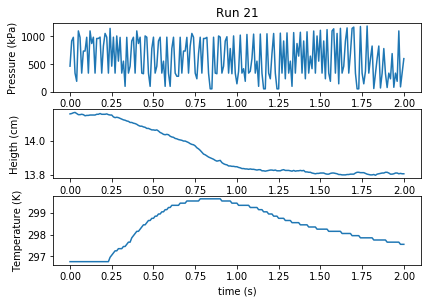

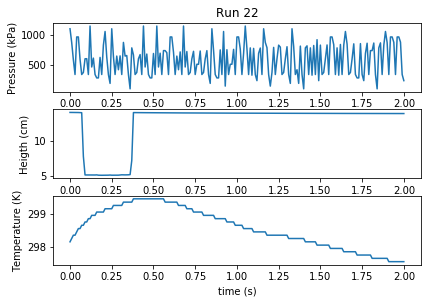

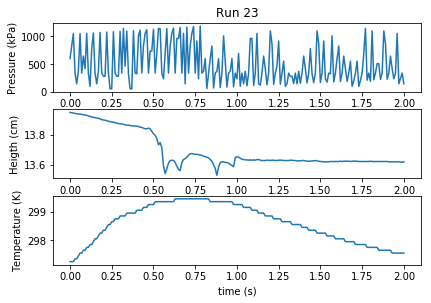

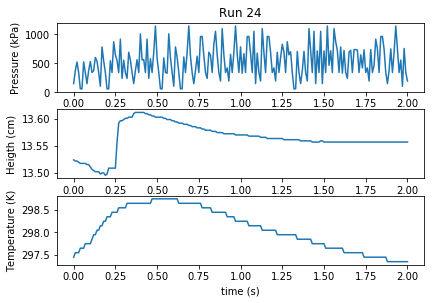

In [34]:
index = 0
for run in data_AH:
    plt.figure(index + 1) 
    plt.subplot(311)
    plt.plot(data_AH[index][0],data_AH[index][1] )
    plt.ylabel('Pressure (kPa)')
    plt.xlabel('time (s)')
    plt.title('Run ' + str(index + 1))


    plt.subplot(312)
    plt.plot(data_AH[index][0],data_AH[index][2] )
    plt.xlabel('time (s)')
    plt.ylabel('Heigth (cm)')



    plt.subplot(313)
    plt.plot(data_AH[index][0],data_AH[index][3] )
    plt.xlabel('time (s)')
    plt.ylabel('Temperature (K)')

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()
    index +=1

# Plots Isothermic Helium

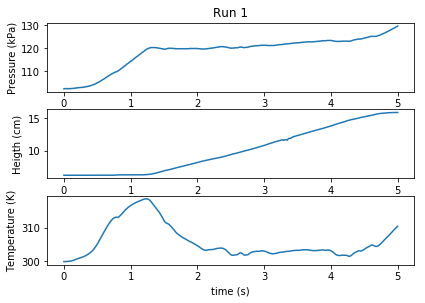

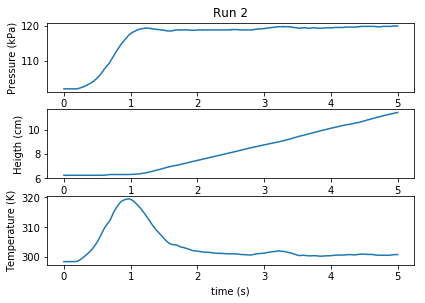

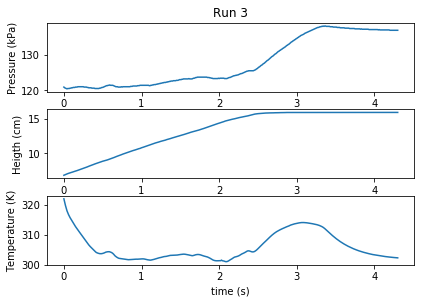

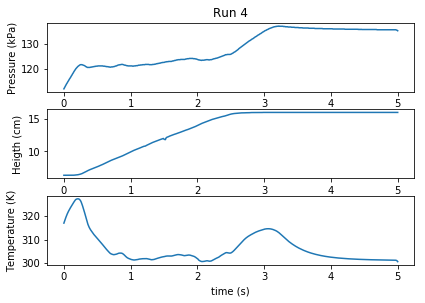

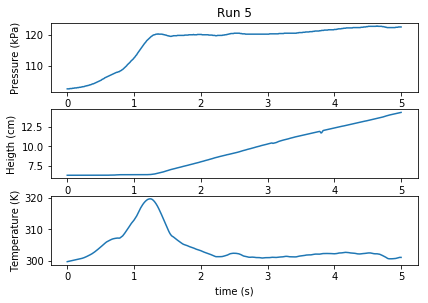

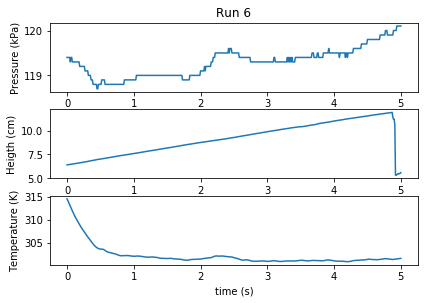

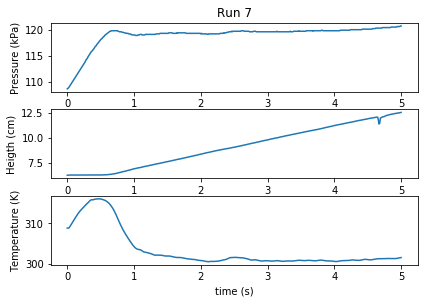

In [35]:
index = 0
for run in data_IH:
    plt.figure(index + 1) 
    plt.subplot(311)
    plt.plot(data_IH[index][0],data_IH[index][3] )
    plt.ylabel('Pressure (kPa)')
    plt.xlabel('time (s)')
    plt.title('Run ' + str(index + 1))


    plt.subplot(312)
    plt.plot(data_IH[index][0],data_IH[index][4] )
    plt.xlabel('time (s)')
    plt.ylabel('Heigth (cm)')



    plt.subplot(313)
    plt.plot(data_IH[index][0],data_IH[index][5] )
    plt.xlabel('time (s)')
    plt.ylabel('Temperature (K)')

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()
    index +=1